In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress

In [100]:
# File to Load (Remember to Change These)
file= "case_demographics_ethnicity.csv"

# Read Purchasing File and store into Pandas data frame
df= pd.read_csv(file)


In [101]:
df

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
0,Latino,5276,35.99,170,28.38,38.9,4/13/2020
1,Latino,5910,37.18,203,29.72,38.9,4/14/2020
2,Latino,6433,37.8,226,29.7,38.9,4/15/2020
3,Latino,7013,38.51,254,29.85,38.9,4/16/2020
4,Latino,7627,39.41,281,30.58,38.9,4/17/2020
...,...,...,...,...,...,...,...
5086,Multi-Race,40752,1.5,626,1.3,2.2,2/24/2021
5087,American Indian or Alaska Native,8770,0.3,167,0.3,0.5,2/24/2021
5088,Native Hawaiian and other Pacific Islander,15097,0.6,302,0.6,0.3,2/24/2021
5089,Other,306466,11.5,1084,2.2,0,2/24/2021


In [102]:
df.count()

race_ethnicity           5091
cases                    5089
case_percentage          5089
deaths                   5089
death_percentage         5089
percent_ca_population    5089
date                     5089
dtype: int64

In [112]:
Ethnicity_df=df.dropna(how="any")
Ethnicity_df.count()

race_ethnicity           5089
cases                    5089
case_percentage          5089
deaths                   5089
death_percentage         5089
percent_ca_population    5089
date                     5089
dtype: int64

In [104]:
Ethnicity_df.nunique()


race_ethnicity             11
cases                    2461
case_percentage           402
deaths                   1431
death_percentage          380
percent_ca_population       9
date                      319
dtype: int64

In [105]:
Ethnicity_df["race_ethnicity"].value_counts()

Other                                         636
Latino                                        636
Asian                                         636
Black                                         636
White                                         636
American Indian or Alaska Native              636
Native Hawaiian and other Pacific Islander    538
Multi-Race                                    538
Multiracial                                    98
Native Hawaiian or Pacific Islander            98
race_ethnicity                                  1
Name: race_ethnicity, dtype: int64

In [106]:
Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="race_ethnicity", : ]

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
2545,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date


In [108]:
Ethnicity_df=Ethnicity_df.loc[(Ethnicity_df["race_ethnicity"]!="race_ethnicity")]
Ethnicity_df["race_ethnicity"].value_counts()

Other                                         636
Latino                                        636
Asian                                         636
Black                                         636
White                                         636
American Indian or Alaska Native              636
Native Hawaiian and other Pacific Islander    538
Multi-Race                                    538
Multiracial                                    98
Native Hawaiian or Pacific Islander            98
Name: race_ethnicity, dtype: int64

In [109]:
Ethnicity_df.describe()

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
count,5088,5088,5088,5088,5088,5088,5088
unique,10,2460,401,1430,379,8,318
top,Other,683,0.3,14,0.5,0.3,7/29/2020
freq,636,6,330,60,484,636,16


([<matplotlib.patches.Wedge at 0x1f5f786d700>,
 [Text(-1.0490886458230495, 0.3307763794547007, 'Latino'),
  Text(-0.975711916496044, -0.5079234745585371, 'White'),
  Text(-0.3307763794547012, -1.0490886458230495, 'Asian'),
  Text(0.5079234745585366, -0.9757119164960444, 'Black'),
  Text(1.0490886458230495, -0.33077637945470123, 'Multiracial'),
  Text(0.9757119164960444, 0.5079234745585366, 'American Indian or Alaska Native'),
  Text(0.3936128787430089, 1.027165469477845, 'Native Hawaiian or Pacific Islander'),
  Text(-0.32342700979543526, 1.0513776530508834, 'Other'),
  Text(-0.7011523936733198, 0.8475761445711967, 'Multi-Race'),
  Text(-0.7983479997236291, 0.7567301179002197, 'Native Hawaiian and other Pacific Islander')],
 [Text(-0.5722301704489361, 0.180423479702564, '12.5%'),
  Text(-0.532206499906933, -0.2770491679410202, '12.5%'),
  Text(-0.18042347970256425, -0.572230170448936, '12.5%'),
  Text(0.2770491679410199, -0.5322064999069333, '12.5%'),
  Text(0.572230170448936, -0.18042

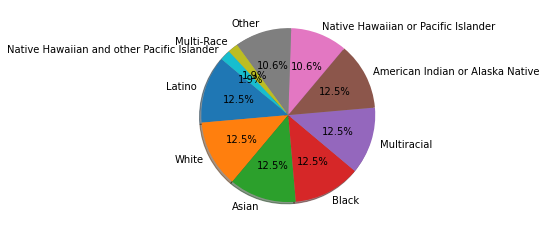

In [110]:


sizes= Ethnicity_df["race_ethnicity"].value_counts()

labels=Ethnicity_df["race_ethnicity"].unique()

plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

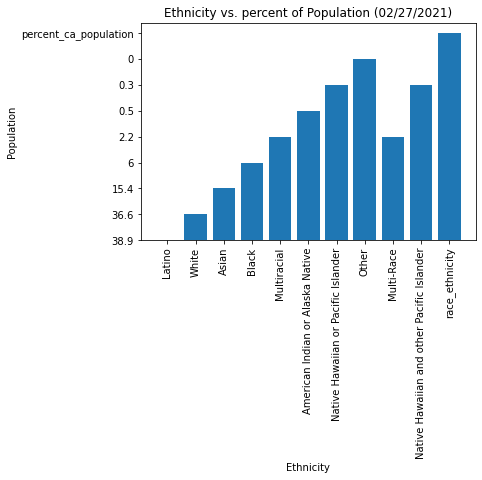

In [113]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Scatter["race_ethnicity"]
y_values = Scatter["percent_ca_population"]


plt.bar(x_values,y_values,align="center")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. percent of Population (02/27/2021)")
plt.xlabel('Ethnicity')
plt.ylabel('Population')
plt.show()

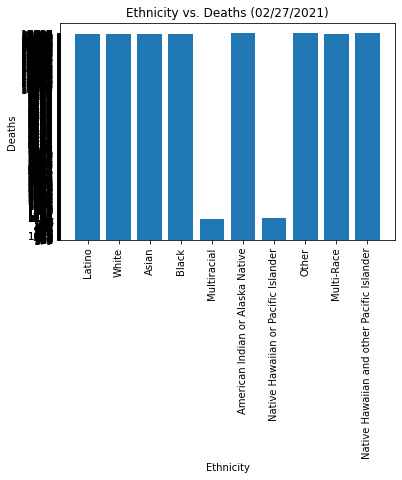

In [111]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Scatter["race_ethnicity"]
y_values = Scatter["deaths"]


plt.bar(x_values,y_values,align="center")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. Deaths (02/27/2021)")
plt.xlabel('Ethnicity')
plt.ylabel('Deaths')
plt.show()

In [80]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Stats= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]
# cases_outliers=Stats.loc[Stats["race_ethnicity"]=="Latino"]
# Latino=cases_outliers["cases"]

# quartiles = Latino.quantile([.25,.5,.75])
# print(quartiles)
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# print(f"The lower quartile of Volumes is: {lowerq}")
# print(f"The upper quartile of Volumes is: {upperq}")
# print(f"The interquartile range of Volumes is: {iqr}")
# print(f"The the median of Volumes is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


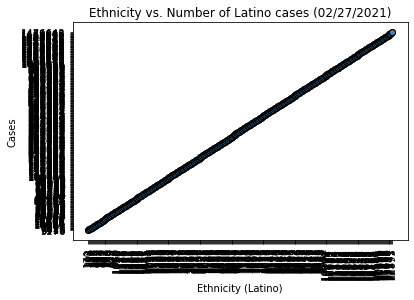

In [67]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]
Latino=Scatter.loc[Scatter["race_ethnicity"]=="Latino"]

x_values = Latino["deaths"]
y_values = Latino["cases"]


plt.scatter(x_values,y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. Number of Latino cases (02/27/2021)")
plt.xlabel('Ethnicity (Latino)')
plt.ylabel('Cases')
plt.show()

In [ ]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Scatter["race_ethnicity"]
y_values = Scatter["cases"]


plt.bar(x_values,y_values,align="center")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. Deaths (02/27/2021)")
plt.xlabel('Ethnicity')
plt.ylabel('Deaths')
plt.show()

In [ ]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Scatter["race_ethnicity"]
y_values = Scatter["deaths"]


plt.bar(x_values,y_values,align="center")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. Deaths (02/27/2021)")
plt.xlabel('Ethnicity')
plt.ylabel('Deaths')
plt.show()

In [64]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cases_outliers=Ethnicity_df["deaths"]

quartiles = cases_outliers.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volumes is: {lowerq}")
print(f"The upper quartile of Volumes is: {upperq}")
print(f"The interquartile range of Volumes is: {iqr}")
print(f"The the median of Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


0.25      73.0
0.50     376.5
0.75    2082.0
Name: deaths, dtype: float64
The lower quartile of Volumes is: 73.0
The upper quartile of Volumes is: 2082.0
The interquartile range of Volumes is: 2009.0
The the median of Volumes is: 376.5 
Values below -2940.5 could be outliers.
Values above 5095.5 could be outliers.


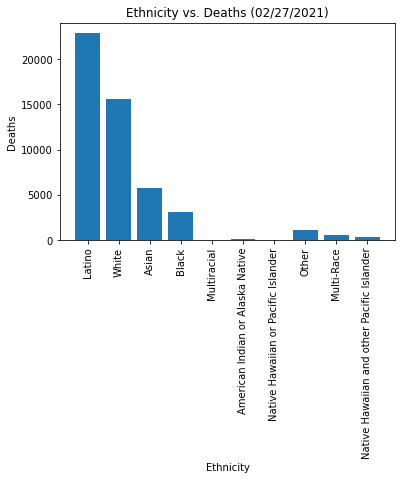

In [49]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Scatter["race_ethnicity"]
y_values = Scatter["deaths"]


plt.bar(x_values,y_values,align="center")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. Deaths (02/27/2021)")
plt.xlabel('Ethnicity')
plt.ylabel('Deaths')
plt.show()

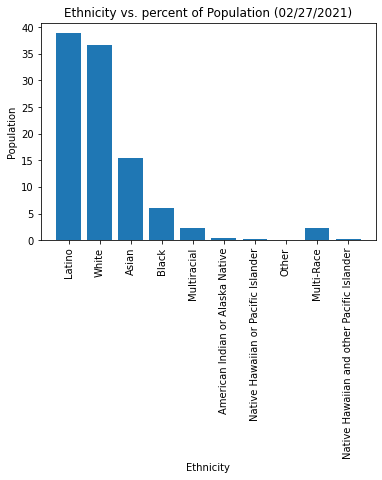

In [67]:
Scatter= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Scatter["race_ethnicity"]
y_values = Scatter["percent_ca_population"]


plt.bar(x_values,y_values,align="center")
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. percent of Population (02/27/2021)")
plt.xlabel('Ethnicity')
plt.ylabel('Population')
plt.show()